## Gives a user with at least one published paper similar users

In [56]:
#import relevant packages
import numpy as np
import pandas as pd
import similarity as sm
import matplotlib.pyplot as plt
import imp
import re
imp.reload(sm)

<module 'similarity' from '/home/013786240/.local/lib/python3.7/site-packages/similarity/__init__.py'>

In [2]:
article_data = pd.read_pickle('abstract.pkl')

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', strip_accents='ascii', max_df = .9, min_df = .001)
# vectorization that gets papers just like the writer's
#vectorizer = TfidfVectorizer(strip_accents='ascii', max_df = .9, min_df = .001)

In [4]:
corpus = list(article_data.abstract)

In [34]:
text_vectorized = vectorizer.fit_transform(corpus)

In [35]:
text_vectorized.shape

(1789904, 6384)

In [7]:
def cosine_similarity(from_ids, text_vectorized):
    
    N = len(article_data)
    M = len(from_ids)
    similarity_array = np.empty((N,M))

    for i in range(M):
        
        index = list(article_data[article_data.id == from_ids[i]].index)[0]
    
        similarity = np.dot(text_vectorized, text_vectorized[index].T)
        similarity = similarity.todense()
        similarity += 1
        similarity_array[:, i] = np.squeeze(similarity)
    
    similarity_score = M / np.sum(1/similarity_array, axis = 1)
    similarity_score += -1
    
    return similarity_score

In [8]:
def text_only_similarity(from_ids, text_vectorized):
    
    df = pd.DataFrame()
    df['id'] = article_data['id']
    df['similarity_score'] = cosine_similarity(from_ids, text_vectorized)
    df.sort_values(by = 'similarity_score', ascending = False, inplace = True)
    
    return df

In [12]:
article_data.sample() 

,abstract,authors,authors_parsed,categories,comments,doi,id,journal-ref,license,report-no,submitter,title,update_date,versions,num_authors,authors_cleaned
173764,Position measurements are examined under the...,Seiji Kosugi,"[[Kosugi, Seiji, ]]",quant-ph,"Corrected typos. 18 pages, to be published in ...",10.1143/PTP.123.431,1002.3005,"Prog. Theor, Phys. 123 (2010) 431-448",http://arxiv.org/licenses/nonexclusive-distrib...,None,Seiji Kosugi,Position Uncertainty in the Heisenberg Uncerta...,2017-02-01,"[{'version': 'v1', 'created': 'Tue, 16 Feb 201...",1,[kosugiseiji]


In [47]:
article_data.sample()

,abstract,authors,authors_parsed,categories,comments,doi,id,journal-ref,license,report-no,submitter,title,update_date,versions,num_authors,authors_cleaned
662418,We build a four-dimensional quaternion-param...,Sergio Giardino,"[[Giardino, Sergio, ]]",hep-th,None,10.1007/s00006-017-0781-3,1509.07779,Adv. Appl. Clifford Algebras (2017) 27: 2457,http://arxiv.org/licenses/nonexclusive-distrib...,None,Sergio Giardino,Four-dimensional conformal field theory using ...,2018-04-03,"[{'version': 'v1', 'created': 'Fri, 25 Sep 201...",1,[giardinosergio]


In [9]:
new_df = text_only_similarity(['0704.0002'], text_vectorized)

In [10]:
new_df.head(5)

,id,similarity_score
1,0704.0002,1.000000
169745,1001.4457,0.515869
1246993,2002.09570,0.488877
1072556,1901.03009,0.479936
552990,1409.0565,0.479493


In [12]:
for ID in new_df.head(5).id[0:]:
    print('ID: ', ID)
    print('Authors: ', list(article_data[article_data.id == ID].authors)[0])
    print('Title: ', list(article_data[article_data.id == ID].title)[0])
    print()
    print('Abstract: ')
    print(list(article_data[article_data.id == ID].abstract)[0])
    print()
    print('--------------------')
    print()

ID:  0704.0002
Authors:  Ileana Streinu and Louis Theran
Title:  Sparsity-certifying Graph Decompositions

Abstract: 
  We describe a new algorithm, the $(k,\ell)$-pebble game with colors, and use
it obtain a characterization of the family of $(k,\ell)$-sparse graphs and
algorithmic solutions to a family of problems concerning tree decompositions of
graphs. Special instances of sparse graphs appear in rigidity theory and have
received increased attention in recent years. In particular, our colored
pebbles generalize and strengthen the previous results of Lee and Streinu and
give a new proof of the Tutte-Nash-Williams characterization of arboricity. We
also present a new decomposition that certifies sparsity based on the
$(k,\ell)$-pebble game with colors. Our work also exposes connections between
pebble game algorithms and previous sparse graph algorithms by Gabow, Gabow and
Westermann and Hendrickson.


--------------------

ID:  1001.4457
Authors:  J\'er\'emie Chalopin, Victor Chepoi

### Use the Similary to recommend Users!

In [9]:
author_data = pd.read_pickle('authors.pkl')

In [10]:
author_data.sample()

,Authors,Articles,Categories,Num_Articles,Num_Categories
374818,micheligiacomo,"[1306.5326, 1309.6591, 1311.1442, 1409.3020, 1...","[cs.CR, cs.IT, math.IT, math.CO, math.NT, math...",26,9


In [53]:
# verifying if results have a known author
for ID in author_data.loc[374818, 'Articles']:
    print('ID: ', ID)
    print('Authors: ', list(article_data[article_data.id == ID].authors)[0])
    #print('Authors: ', list(article_data[article_data.id == ID].authors_parsed)[0])
    print('Title: ', list(article_data[article_data.id == ID].title)[0])
    print()
    print('--------------------')
    print()

ID:  1306.5326
Authors:  Giacomo Micheli
Title:  Cryptanalysis of a non-commutative key exchange protocol

--------------------

ID:  1309.6591
Authors:  Giacomo Micheli, Davide Schipani
Title:  On Canonical Subfield Preserving Polynomials

--------------------

ID:  1311.1442
Authors:  Giacomo Micheli, Michele Schiavina
Title:  A general construction for monoid-based knapsack protocols

--------------------

ID:  1409.3020
Authors:  Giacomo Micheli, Joachim Rosenthal, Paolo Vettori
Title:  Linear spanning sets for matrix spaces

--------------------

ID:  1409.6527
Authors:  Andrea Ferraguti, Giacomo Micheli
Title:  On Mertens-Ces\`aro Theorem for Number Fields

--------------------

ID:  1411.6876
Authors:  Giacomo Micheli and Reto Schnyder
Title:  On the Density of Coprime m-tuples over Holomorphy Rings

--------------------

ID:  1506.05380
Authors:  Edoardo Dotti, Giacomo Micheli
Title:  Eisenstein Polynomials over Function Fields

--------------------

ID:  1507.02753
Authors:  G

In [63]:
def abstract_similarity(from_ids, text_vectorized):
    
    df = pd.DataFrame()
    df['id'] = article_data['id']
    df['similarity_score'] = cosine_similarity(from_ids, text_vectorized)
    df.sort_values(by = 'similarity_score', ascending = False, inplace = True)
    
    return df.iloc[0:11]

def name2user(last_name, first_name):
    name = re.sub('[^a-z]', '', (last_name + first_name).lower())
    idx = author_data.index[author_data['Authors'] == name].tolist()
    return idx[0]

In [66]:
def similar_authors(last_name, first_name, num_authors, text_vectorized):
    #user = 5857
    
    user = name2user(last_name, first_name)
    top_papers = []
    num_art = author_data.loc[user, 'Num_Articles']
    
    # creat a dataframe with the paperts similar to the user's
    #currentlys gives back the 10 most similar papers/users back to here.
    for i in range(num_art):
        ID = author_data.loc[user, 'Articles'][i]
        abs_df = abstract_similarity([ID], text_vectorized)
        top_papers.extend(abs_df.values.tolist())
    
    #organize the similar papers by the similarity score. This sends the ones written by this author to the top
    #should drop the papers written by them here...
    #the limitation to this method is that it's harder to remove authors that the given user knows
    organize_papers = pd.DataFrame(top_papers,columns=['id' ,'similarity_score'])
    organize_papers.sort_values(by = 'similarity_score', ascending = False, inplace = True)
    
    
    # save this to check that the other articles aren't one the user has written
    users_articles = author_data.loc[user, 'Articles']
    NUM_OF_AUTHORS = num_authors
    
    # Remove papers that the author co wrote and remove papers that are repeated.
    for i in range(num_art):
        organize_papers = organize_papers[organize_papers.id != users_articles[i]]
    organize_papers = organize_papers.drop_duplicates(subset=['id'])
    
    #Initialize Similar authors frame
    sim_authors = pd.DataFrame(columns=['last_name', 'first_name' ,'id', 'similarity_score'])
    
    #Only takes the first author of a paper (for now)
    for ID in organize_papers.head(NUM_OF_AUTHORS).id[0:]:
        authors_per_paper = list(article_data[article_data.id == ID].authors_parsed)[0][0]
        sim_authors = sim_authors.append(
            {
                'last_name': authors_per_paper[0],
                'first_name': authors_per_paper[1],
                'id':  ID,
                'similarity_score': organize_papers[organize_papers.id == ID].similarity_score.values
            },
            ignore_index=True
        )
        
    # Here there is a chance for 2 things. 1) Co authors who wrote similar papers to appear
    # 2) Repeated authors to appear because they wrote multiple similar papers.
    return sim_authors.iloc[0:NUM_OF_AUTHORS, 0:2]
#sim_authors.head(NUM_OF_AUTHORS)

In [67]:
similar_authors('Micheli', 'Giacomo', 10, text_vectorized)

,last_name,first_name
0,Agustín-Aquino,Octavio Alberto
1,Wang,Yan-Ling
2,Casanovas,Enrique
3,Kurilic,Milos
4,Stasinski,Alexander
5,Zhang,John
6,Wickelgren,Kirsten
7,Szpojankowski,Kamil
8,Chen,Yin
9,Wong,Yat-Sen


In [38]:
user = 487714
top_papers = []
num_art = num_art = author_data.loc[user, 'Num_Articles']
    
for i in range(num_art):
    ID = author_data.loc[user, 'Articles'][i]
    abs_df = abstract_similarity([ID], text_vectorized)
    top_papers.extend(abs_df.values.tolist())
organize_papers = pd.DataFrame(top_papers,columns=['id' ,'similarity_score'])
organize_papers.sort_values(by = 'similarity_score', ascending = False, inplace = True)

NUM_OF_AUTHORS = 10
organize_papers.shape

(319, 2)

In [39]:

users_articles = author_data.loc[user, 'Articles']

for i in range(num_art):
    organize_papers = organize_papers[organize_papers.id != users_articles[i]]

organize_papers.shape

(280, 2)

In [44]:
organize_papers.head(20)

,id,similarity_score
254,1808.04091,0.754367
67,2007.08619,0.667991
144,1707.01184,0.653633
145,1804.01963,0.647089
68,1402.0367,0.642786
221,2008.06414,0.635395
69,1911.07046,0.634448
309,1808.04091,0.628069
146,1309.3949,0.626748
70,1403.2165,0.625999


In [47]:
organize_papers = organize_papers.drop_duplicates(subset=['id'])
organize_papers.shape
#organize_papers.head(20)

(264, 2)

In [21]:
organize_papers.iloc[29:41]

,id,similarity_score
67,0710.5254,0.815515
68,2007.08619,0.787309
69,2006.15621,0.776135
70,1909.00088,0.770460
71,1705.10771,0.769061
72,1505.00454,0.764415
89,1706.06197,0.759261
56,1711.06528,0.759261
73,1809.02219,0.758563
74,1911.07046,0.754192


In [22]:
# This case takes only the first Author of a paper
sim_authors = pd.DataFrame(columns=['last_name', 'first_name' ,'id', 'similarity_score'])
for ID in organize_papers.head(NUM_OF_AUTHORS+num_art).id[num_art:]:
    authors_per_paper = list(article_data[article_data.id == ID].authors_parsed)[0][0]
    sim_authors = sim_authors.append(
        {
            'last_name': authors_per_paper[0],
            'first_name': authors_per_paper[1],
            'id':  organize_papers[organize_papers.id == ID].id.values,
            'similarity_score': organize_papers[organize_papers.id == ID].similarity_score.values
        },
        ignore_index=True
    )

In [23]:
# when the same paper appears multiple times...it's similar to multiple papers
#if sim is 
sim_authors.head(NUM_OF_AUTHORS)

,last_name,first_name,id,similarity_score
0,Kim,Minhyong,"[0710.5254, 0710.5254]","[0.8155148519556765, 0.7170654679503028]"
1,Britton,Mathew,"[2007.08619, 2007.08619]","[0.7873089258823549, 0.6883274582240728]"
2,Malarz,Krzysztof,"[2006.15621, 2006.15621]","[0.7761352771079277, 0.6816572084408405]"
3,Feng,Steven Y.,[1909.00088],[0.7704604155997052]
4,Chakraborty,Nilesh,[1705.10771],[0.7690612576003131]
5,Chernikov,Artem,"[1505.00454, 1505.00454]","[0.7644150876292732, 0.6715758648962975]"
6,Sun,Xu,"[1706.06197, 1706.06197]","[1.0, 0.7592612936483181]"
7,Sun,Xu,"[1711.06528, 1711.06528]","[1.0000000000000004, 0.7592612936483181]"
8,Baranau,Vasili,[1809.02219],[0.7585633686641664]
9,Wang,Qitong,[1911.07046],[0.7541923278489207]


In [87]:
# no problems when there is only a few papers. The authors are unique and the papers aren't present multiple times.
sim_authors.head(NUM_OF_AUTHORS)

,last_name,first_name,id,similarity_score
0,Haroske,Dorothee D.,1905.09703,0.512863
1,Zang,Wenston J. T.,1811.10013,0.511020
2,Gallaun,Dennis,1905.10285,0.501246
3,Hoyrup,Mathieu,1712.03680,0.498101
4,Mal,Arpita,2007.12628,0.483316
5,Zhang,Xiaoxiang,1307.5528,0.480675
6,Aistleitner,Christoph,1306.3315,0.478942
7,Shi,Jian,1306.2397,0.475034
8,Furmanczyk,H.,1602.01867,0.474434
9,Belyaev,A. A.,1801.01830,0.474148


In [58]:
#Structure pick max of 3 authors from each paper. Often the most important are the first and last person
#First is the grad student who wrote it and the last is the professor
#Make a dataframe with the sim score of each author. We have to note the writers on the papers they wrote
#And remove them. Also Submitter is often the first author (though there are cases which this isn't true)
#num_articles = there number of papers to remove from the top, but this has the authors we need to remove.
for ID in organize_papers.head(NUM_OF_AUTHORS).id[0:]:
    print('Authors: ', list(article_data[article_data.id == ID].authors_parsed)[0])

Authors:  [['Bombach', 'Clemens', '']]
Authors:  [['Bombach', 'Clemens', ''], ['Gallaun', 'Dennis', ''], ['Seifert', 'Christian', ''], ['Tautenhahn', 'Martin', '']]
Authors:  [['Haroske', 'Dorothee D.', ''], ['Moura', 'Susana D.', ''], ['Skrzypczak', 'Leszek', '']]
Authors:  [['Zang', 'Wenston J. T.', ''], ['Zhang', 'Helen W. J.', '']]
Authors:  [['Gallaun', 'Dennis', ''], ['Seifert', 'Christian', ''], ['Tautenhahn', 'Martin', '']]
Authors:  [['Hoyrup', 'Mathieu', '']]
Authors:  [['Mal', 'Arpita', ''], ['Sey', 'Subhrajit', ''], ['Paul', 'Kallol', '']]
Authors:  [['Zhang', 'Xiaoxiang', ''], ['Zhang', 'Shuangshuang', ''], ['Chen', 'Jianlong', ''], ['Wang', 'Long', '']]
Authors:  [['Aistleitner', 'Christoph', '']]
Authors:  [['Shi', 'Jian', ''], ['Gao', 'Zongsheng', '']]


### Check the CS parts

The following code is just a check that our text vectorization does group papers together properly. Here I verified by transforming the features into 2D data then plotting papers that have similar tags together. In the plots below confidence is determined by pearson correlation coefficient. Most papers with the same tag have close confidence after vectorization.

In [9]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)

text_2d = svd.fit_transform(text_vectorized)
text_2d.shape

(1789904, 2)

In [10]:
categories_sep = [categories.split() for categories in article_data.categories]

In [11]:
categories_num = [len(categories) for categories in categories_sep]

In [12]:
article_data['x'] = text_2d[:,0]
article_data['y'] = text_2d[:,1]
article_data['categories'] = categories_sep
article_data['categories_num'] = categories_num

In [15]:
categories_set = list(set([category for categories in article_data.categories for category in categories]))
print(len(categories_set))

176


In [23]:
cs_plot = ['cs.AI cs.AR cs.CC cs.CE cs.CG cs.CL cs.CR cs.CV cs.CY cs.DB cs.DC cs.DL cs.DM cs.DS cs.ET cs.FL cs.GL cs.GR cs.GT cs.HC cs.IR cs.IT cs.LG cs.LO cs.MA cs.MM cs.MS cs.NA cs.NE cs.NI cs.OH cs.OS cs.PF cs.PL cs.RO cs.SC cs.SD cs.SE cs.SI cs.SY']

In [24]:
to_plot = cs_plot[0].split()

In [25]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std, **kwargs):
    
    cov = np.cov(x,y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    
    rad_x = np.sqrt(1 + pearson)
    rad_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width = 2*rad_x, height = 2*rad_y, facecolor = 'none', **kwargs)
    
    scale_x = np.std(x)*n_std
    x_bar = np.mean(x)
    
    scale_y = np.std(y)*n_std
    y_bar = np.mean(y)
    
    transform = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(x_bar, y_bar)
    
    ellipse.set_transform(transform + ax.transData)
    
    return ax.add_patch(ellipse)

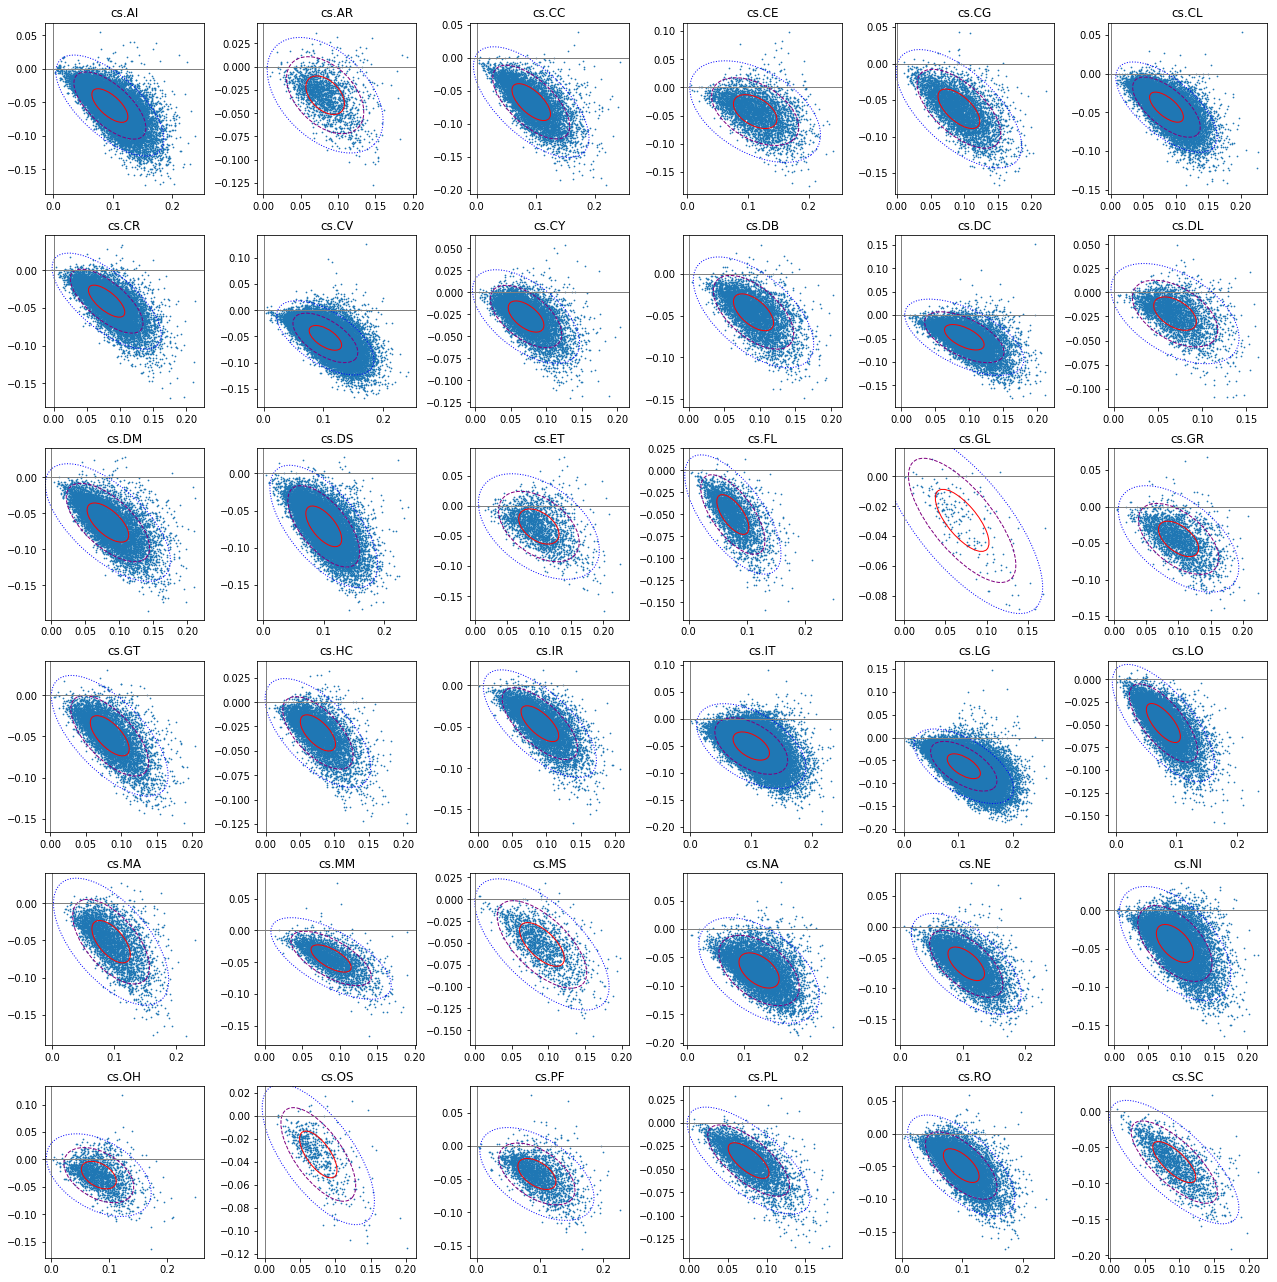

In [26]:
fig, axs = plt.subplots(7, 6, figsize = (18, 18))
fig.tight_layout(pad = 2)
for ax, category in zip(np.ndarray.flatten(axs), to_plot):
    of_interest = [category in categories for categories in article_data.categories]
    x = article_data[of_interest].x
    y = article_data[of_interest].y
    
    ax.scatter(x, y, s = 0.5)
    ax.axvline(c = 'grey', lw = 1)
    ax.axhline(c = 'grey', lw = 1)
    confidence_ellipse(x, y, ax, 1, edgecolor = 'red')
    confidence_ellipse(x, y, ax, 2, edgecolor = 'purple', linestyle = '--')
    confidence_ellipse(x, y, ax, 3, edgecolor = 'blue', linestyle = ':')
    
    ax.set_title(category)